## 1. 라이브러리 및 데이터
## Library & Data

In [ ]:
import pandas as pd  #판다스 패키지 불러오기
from sklearn.linear_model import LogisticRegression   # 로지스틱 회귀 모델 불러오기
from sklearn.tree import DecisionTreeClassifier   # 의사결정 나무 모델 불러오기


## pd.read_csv()
- csv파일 읽는 함수

In [ ]:
# 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/데이터분석/타이타닉/data/train.csv') # 모델 학습 파일
test = pd.read_csv('/content/drive/MyDrive/데이터분석/타이타닉/data/test.csv') # 모델 시험지 파일
submission = pd.read_csv('/content/drive/MyDrive/데이터분석/타이타닉/data/submission.csv') # 답안지 파일

## 2. 탐색적 자료분석
## Exploratory Data Anlysis (EDA)

## pd.DataFrame.head()
- 데이터 프레임의 위에서부터 n개의 행을 보여주는 함수
- n의 기본 값(default)은 5

In [ ]:
train.head(10)

In [ ]:
test.head()

In [ ]:
submission.head()

- PassengerId : 탑승객의 고유 아이디
- Survival : 생존여부(0:사망, 1:생존)
- Pclass : 등실의 등급(1: 1등급, 2: 2등급, 3: 3등급)
- Name : 이름
- Sex : 성별
- Age : 나이
- Sibsp : 함께 탑승한 형제자매, 아내 남편의 수
- Parch : 함께 탑승한 부모, 자식의 수
- Ticket : 티켓번호
- Fare : 티켓의 요금
- Cabin : 객실번호
- Embarked : 배에 탑승한 위치(C = Cherbourg, Q = Queenstown, S = Southampton)

## pd.DataFrame.tail()
- 데이터 프레임의 아래에서 부터 n개의 행을 보여주는 함수
- n의 기본값(default)은 5

In [ ]:
train.tail()

## pd.DataFrame.shape
- 데이터 프레임의 행의 개수와 열의 개수가 저장되어 있는 속성(attribute)
- 소괄호를 붙이지 않음

In [ ]:
train.shape

In [ ]:
print(test.shape)
print(submission.shape)

## pd.DataFrame.info()
- 데이터 셋의 column별 정보를 알려주는 함수
- 비어 있지 않은 값은 (non-null)은 몇개인지?
- column의 type은 무엇인지? 
 - type의 종류 : int(정수), float(실수), object(문자열), 등등(date, ...)

In [ ]:
train.info()

## pd.DataFrame.describe()
- 숫자형 (int, float) column들의 기술 통계량을 보여주는 함수
- 기술통계량이란?
 - 해당 column을 대표할 수 있는 통계값들을 의미
- 기술통계량 종류
 - count : 해당 column에서 비어있지 않은 값의 개수
 - mean : 평균
 - std : 표준편차
 - min : 최솟값 (이상치 포함)
 - 25% (Q1) : 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4 지점에 있는 값
 - 50% (Q2) : 중앙값 (전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4 지점에 있는 값
 - 75% (Q3) : 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4 지점에 있는 값
 - max : 최댓값 (이상치 포함)
- 이상치 : 울타리 밖에 있는 부분을 이상치라고 정의함
 - 아래쪽 울타리 : Q1 - 1.5 * IQR
 - 위쪽 울타리 : Q3 + 1.5 * IQR
 - IQR = Q3 - Q1

In [ ]:
train.describe()

## pd.Series.value_counts()
### Series : 하나의 열
- series 내 고유값들 각각의 개수를 보여주는 함수
- 가장 많이 나오는 고유값들 순서로 보여줍니다.
- 비어있는 값은 고려하지 않습니다.

In [ ]:
train['Embarked'].value_counts()

## pd.Series.unique()
- 해당 series의 고유값들만 보여주는 함수
- [1, 1, 1, 3] 이라는 시리즈가 있다면, unique() 함수 적용시 [1, 3]이 출력됩니다.
- nan 값이 있을시 nan값도 포함하여 출력한다. (Not a Number)
- 출연하는 순서대로 나오기 때문에, 알파벳 순서 또는 오름차순으로 정렬되어 있지 않습니다.

In [ ]:
train['Embarked'].unique()

## pd.DataFrame.groupby()
- 집단에 대한 통계량 확인
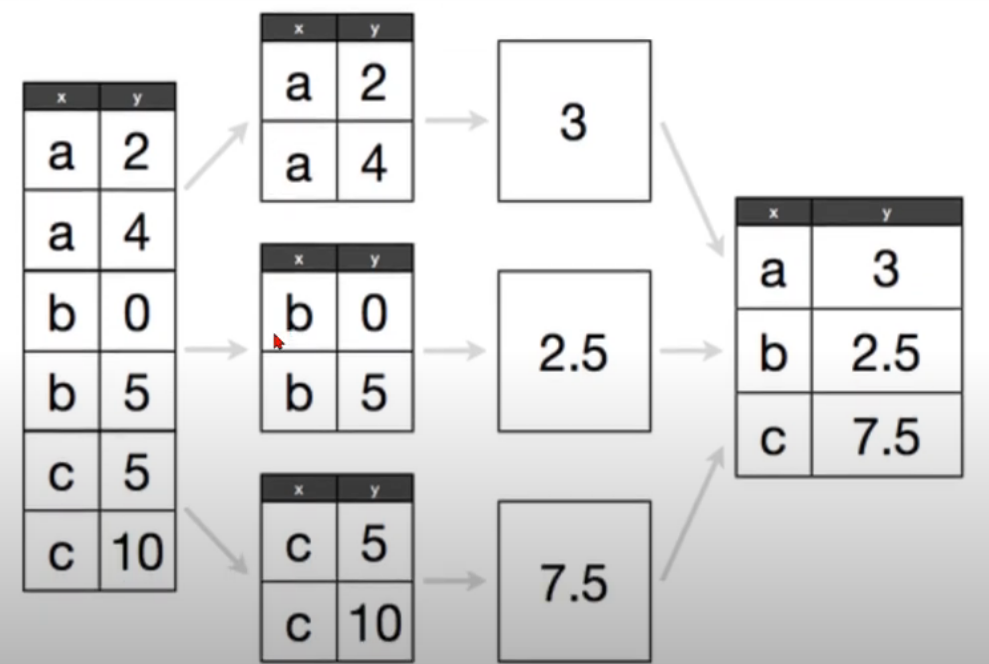

In [ ]:
train.groupby('Sex').mean()

In [ ]:
train.groupby('Pclass').mean()

## pd.Series.plot(kind = "bar")
- 막대 그래프
- index 값이 x축, value값이 y축으로 대응됩니다.
- value_counts()의 결과물을 보여줄 때 유용합니다.
- groupby된 결과물을 보여줄 때 유용합니다.

In [ ]:
train.groupby('Cabin').mean()['Survived'].plot(kind = 'bar', rot = 45)

## pd.Series.plot(kind = 'hist')
- 히스토그램 : 구간별로 속해있는 row의 개수를 시각화 합니다.
- 수치형에서만 가능, 범주는 안됩니다!

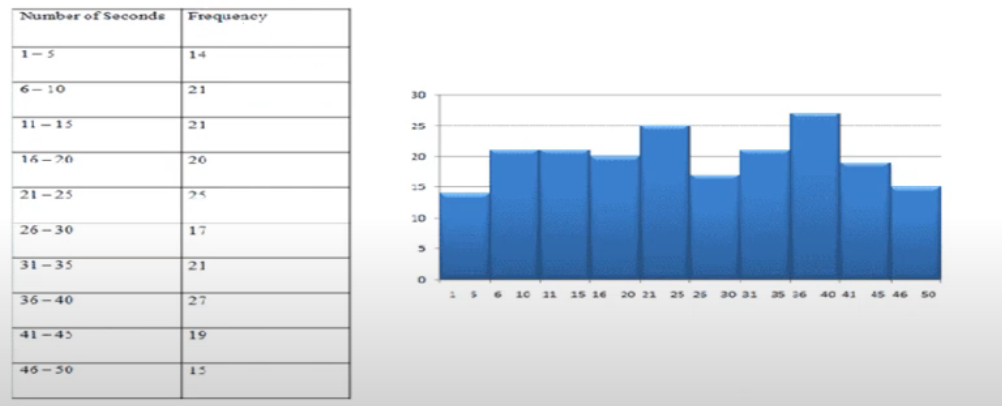

In [ ]:
train['Age'].plot(kind = 'hist', bins = 30, grid = True)
# 보조선은 grid = True 로 그을 수 있음

## pd.DataFrame.plot(x,y,kind = 'scatter')
- 산점도: 두 변수간의 관계를 시각화

In [ ]:
train.plot(x = 'Embarked', y = 'Survived', kind = 'scatter')

# 3. 데이터 전처리
## Data Cleansing & Pre-Processing

## pd.Series.isna()
- 결측치 여부를 확인해줍니다.
- 결측치면 True, 아니면 False

In [ ]:
train.isna().sum()

In [ ]:
test.isna().sum()

In [ ]:
train.info()

## pd.DataFrame.fillna()
- 결측치를 채우고자 하는 colum과 결측치를 대신하여 넣고자 하는 값을 명시해주어야 합니다.
- 범주형 변수일 경우, 최빈값으로 대체할 수 있습니다.

In [ ]:
train['Age'].median()

In [ ]:
train['Age'] = train['Age'].fillna(28)

In [ ]:
test['Age'].median()

In [ ]:
test['Age'] = test['Age'].fillna(27)

In [ ]:
train['Embarked'].value_counts()

In [ ]:
train['Embarked'] = train['Embarked'].fillna('S')

## pd.Series.map()
- 시리즈 내 값을 변환 할 때 사용하는 함수

In [ ]:
train['Sex'] = train['Sex'].map({'male':0, 'female':1})
train['Embarked'] = train['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [ ]:
test.head()

# 4. 변수 선택 및 모델 구축
## Feature Engineering & Initial Modeling

In [ ]:
X_train = train[['Sex', 'Pclass', 'Embarked', 'Age']]
Y_train = train['Survived']

In [ ]:
test['Sex'] = test['Sex'].map({'male':0, 'female':1})
test['Embarked'] = test['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [ ]:
X_test = test[['Sex', 'Pclass', 'Embarked', 'Age']]

## sklearn.linear_model.LogisticRegression()
- 로지스틱 회귀 모형
- 0과 1사이의 값을 산출

In [ ]:
lr = LogisticRegression()

## sklearn.tree.DecisionTreeClassifier()
- 의사결정 나무 모델

In [ ]:
dt = DecisionTreeClassifier()

# 5. 모델 학습 및 검증
## Model Tuning & Evaluation

## model.fit()
- 모델 학습

In [ ]:
lr.fit(X_train, Y_train)

In [ ]:
dt.fit(X_train, Y_train)

## model.predict()
- 모델 예측

In [ ]:
test.head()

In [ ]:
lr.predict(X_test)

## model.predict_proba()
- 모델 예측

In [ ]:
# lr.predict_proba(X_test).shape
lr_pred = lr.predict_proba(X_test)[:,1]

In [ ]:
dt_pred = dt.predict_proba(X_test)[:,1]

In [ ]:
submission['Survived'] = lr_pred
submission

## pd.DataFrame.to_csv()
- csv파일 저장하는 함수

In [ ]:
submission.to_csv('logistic_regression_pred.csv', index = False )

In [ ]:
submission['Survived'] = dt_pred
submission.to_csv('decision_tree_pred.csv', index = False)

# 6. 결과 및 결언
## Conclusion & Discussion